In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from datetime import datetime

In [3]:
import pandas_datareader as web

# Reading the Data from Yahoo finance website directly.

In [4]:
tech_list=['AAPL','GOOG','MSFT','AMZN']

In [7]:
end=datetime.now()
start=datetime(end.year-1,end.month,end.day)

In [11]:
for stock in tech_list:
    globals()[stock]=web.DataReader(stock,'stooq',start,end)

In [12]:
AAPL['COMPANY']='Apple'
GOOG['COMPANY']='Google'
MSFT['COMPANY']='Microsoft'
AMZN['COMPANY']='Amazon'
stocks=pd.concat([AAPL,GOOG,MSFT,AMZN])
stocks

,Open,High,Low,Close,Volume,COMPANY
Date,,,,,,
2022-12-27,131.380,131.410,128.720,130.030,69007830.0,Apple
2022-12-23,130.920,132.415,129.640,131.860,63814893.0,Apple
2022-12-22,134.352,134.560,130.300,132.230,77852108.0,Apple
2022-12-21,132.980,136.810,132.750,135.450,85927993.0,Apple
2022-12-20,131.390,133.250,129.890,132.300,77432819.0,Apple
...,...,...,...,...,...,...
2022-01-03,167.550,170.704,166.160,170.404,63869140.0,Amazon
2021-12-31,168.956,169.350,166.558,166.717,47830380.0,Amazon
2021-12-30,169.700,170.888,168.524,168.644,37583100.0,Amazon


# Cleaning the data

In [13]:
stocks.isna().sum()

Open       0
High       0
Low        0
Close      0
Volume     0
COMPANY    0
dtype: int64

In [14]:
stocks.dtypes

Open       float64
High       float64
Low        float64
Close      float64
Volume     float64
COMPANY     object
dtype: object

In [15]:
type(stocks.index)
#stocks.index=pd.to_datetime(stocks.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [16]:
stocks.duplicated().sum()

0

# Change in stock price over time

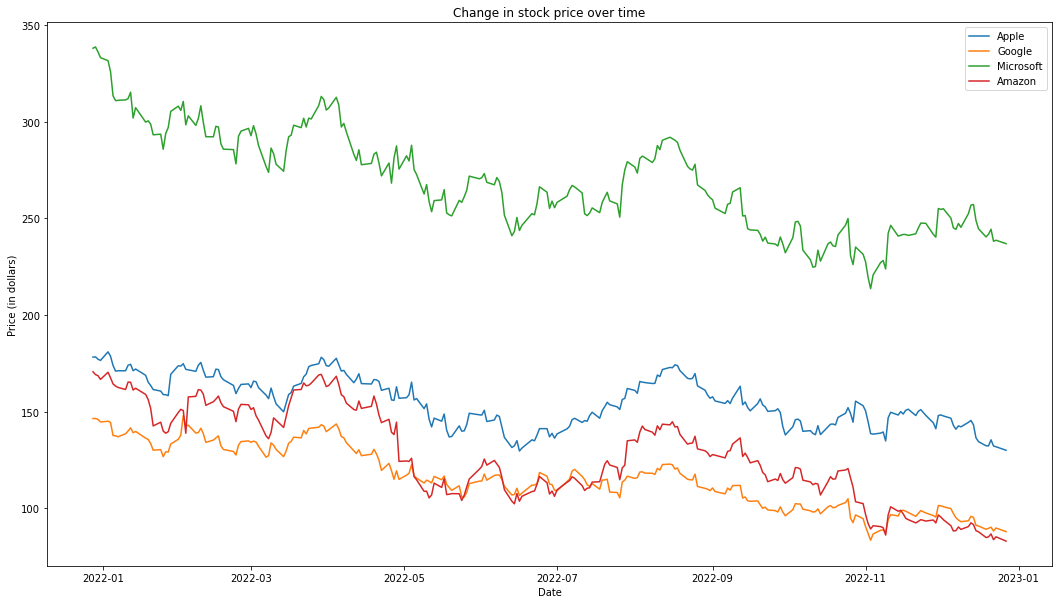

In [18]:
companies=stocks['COMPANY'].drop_duplicates().values
grouped=stocks.groupby('COMPANY')
plt.figure(figsize=(18,10))
#f,ax=plt.subplots(figsize=(18,10))
for comp in companies:
    stock=grouped.get_group(comp)
    plt.plot(stock['Close'])
plt.title('Change in stock price over time')
plt.legend(companies)
plt.ylabel('Price (in dollars)')
plt.xlabel('Date')
plt.show()

# Visualizing the change in a stock’s volume being traded over time

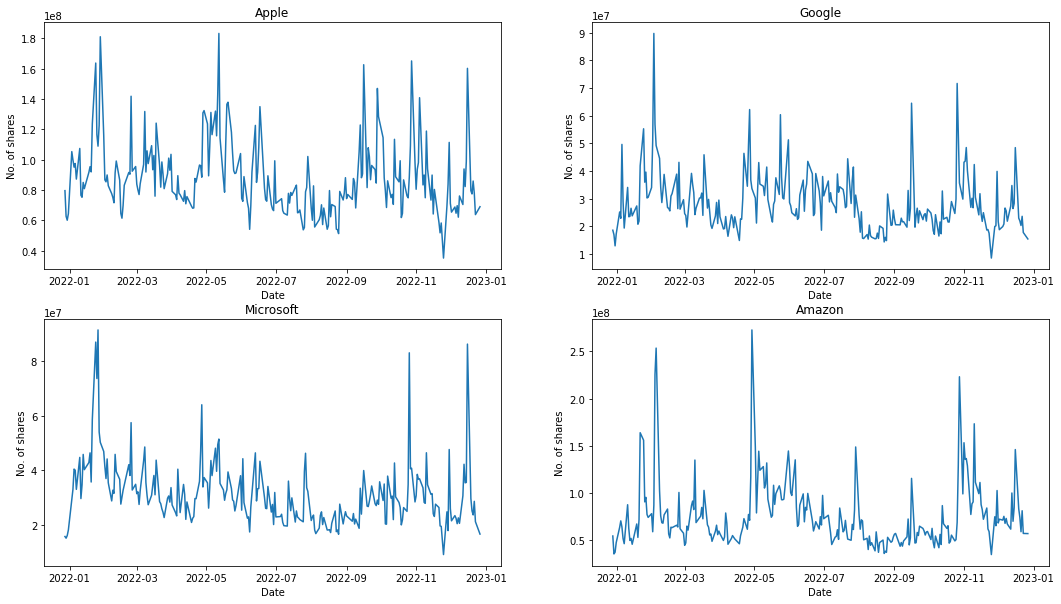

In [19]:
plt.figure(figsize=(18,10))
index=1
for comp in companies:
    plt.subplot(2,2,index)
    stock=grouped.get_group(comp)
    plt.plot(stock['Volume'])
    plt.title(comp)
    plt.xlabel('Date')
    plt.ylabel('No. of shares')
    index+=1

# Moving average of various stocks over 1 year period.

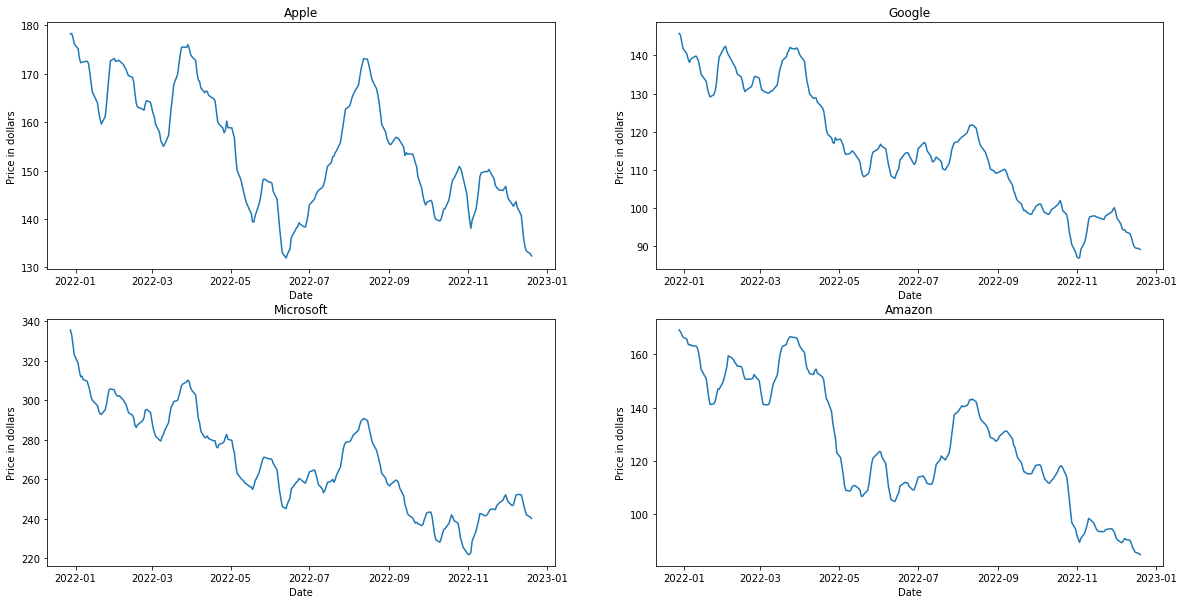

In [21]:
plt.figure(figsize=(20,10))
index=1
for comp in companies:
    stock=grouped.get_group(comp)
    m_average=stock['Close'].rolling(5).mean()
    plt.subplot(2,2,index)
    plt.plot(m_average)
    index+=1
    plt.title(comp)
    plt.xlabel('Date')
    plt.ylabel('Price in dollars')

# Daily return average of each stock

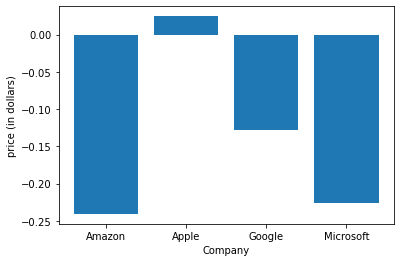

In [22]:
# Adding the column for daily return in stocks dataframe.
stocks['Return']=stocks['Close']-stocks['Open']

# Calculating daily return average for each stock
Return=stocks.groupby('COMPANY')['Return'].mean()

plt.bar(Return.index,Return)
plt.xlabel('Company')
plt.ylabel('price (in dollars)')
plt.show()

# Adding a new Column 'Trend' based on Daily return

In [23]:
def fun(n):
    if n < -0.5:
        return 'Downward'
    elif n>=-0.5 and n<=0.5:
        return 'Sideways'
    else:
        return 'Upward'
stocks['Trend']=stocks['Return'].apply(fun)    
stocks

,Open,High,Low,Close,Volume,COMPANY,Return,Trend
Date,,,,,,,,
2022-12-27,131.380,131.410,128.720,130.030,69007830.0,Apple,-1.350,Downward
2022-12-23,130.920,132.415,129.640,131.860,63814893.0,Apple,0.940,Upward
2022-12-22,134.352,134.560,130.300,132.230,77852108.0,Apple,-2.122,Downward
2022-12-21,132.980,136.810,132.750,135.450,85927993.0,Apple,2.470,Upward
2022-12-20,131.390,133.250,129.890,132.300,77432819.0,Apple,0.910,Upward
...,...,...,...,...,...,...,...,...
2022-01-03,167.550,170.704,166.160,170.404,63869140.0,Amazon,2.854,Upward
2021-12-31,168.956,169.350,166.558,166.717,47830380.0,Amazon,-2.239,Downward
2021-12-30,169.700,170.888,168.524,168.644,37583100.0,Amazon,-1.056,Downward


# Visualizing Trend Frequency For Each Stock

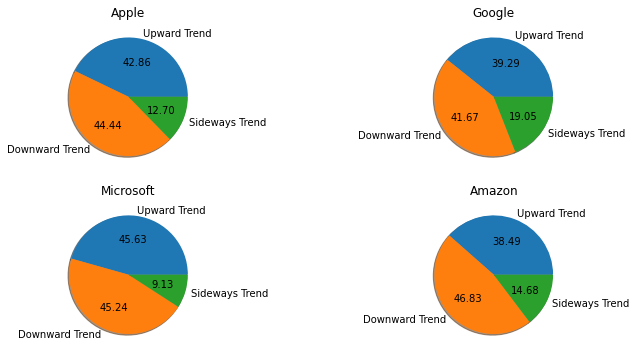

In [24]:
plt.figure(figsize=(12,6))
grouped=stocks.groupby('COMPANY')
index=1
for comp in companies:
    plt.subplot(2,2,index)
    stock=grouped.get_group(comp)
    a=stock['Trend'].value_counts()['Upward']
    b=stock['Trend'].value_counts()['Downward']
    c=stock['Trend'].value_counts()['Sideways']
    plt.pie([a,b,c],labels=['Upward Trend','Downward Trend','Sideways Trend'],autopct='%0.2f',shadow=True)
    #plt.legend()
    plt.title(comp)
    index+=1
